In [1]:
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
from scipy.fftpack import dct
from IPython.display import Audio

Populating the interactive namespace from numpy and matplotlib


In [2]:
import functions.cepstrum as cm

Auswahl des Signalfiles und der Signaldauer

In [3]:
file_name = 'OSR_us_000_0010_8k.wav'
#file_name = 'sound/a.wav'
sig_dur = 3.5

Abtastfrequenz: 8000Hz


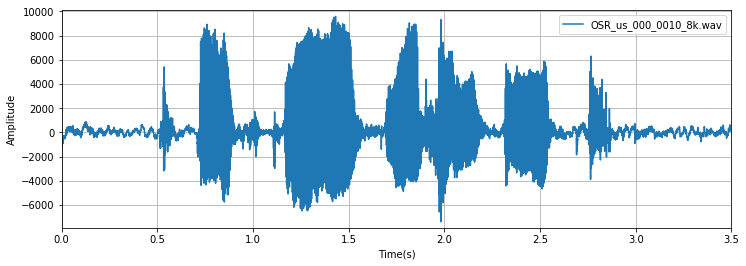

In [4]:
sample_rate, signal = cm.read_show_sig(file_name, sig_dur)

In [5]:
Audio(data = signal, rate = sample_rate)

Höhenanhebung (preemphasis) durch Hochpassfilterung

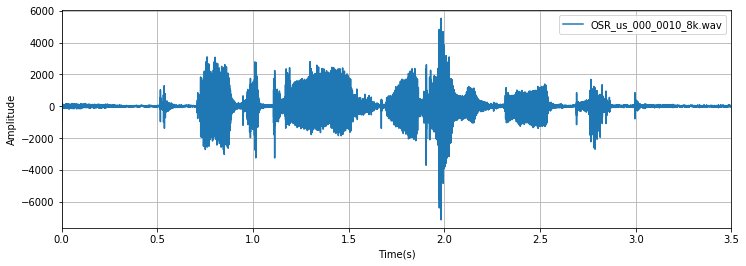

In [6]:
pre_emphasis = 0.97
emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])
cm.show_sig(emphasized_signal, sig_dur, file_name)

In [7]:
Audio(data = emphasized_signal, rate = sample_rate)

Festlegung der Zeitfensterdauer und der Überlappung (in s)

In [8]:
frame_size = 0.025
frame_stride = 0.01

In [9]:
frames = cm.wind_sig(frame_size, frame_stride, sample_rate, emphasized_signal)

Ermittlung des Spektrums

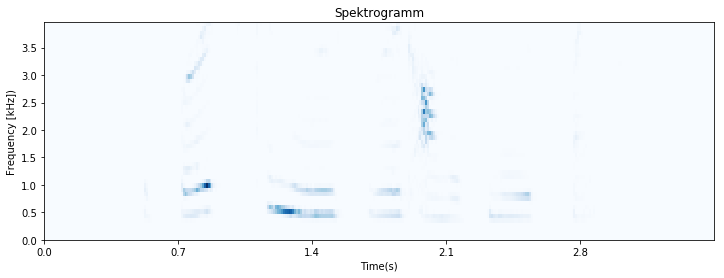

In [10]:
NFFT = int(frames.shape[1])
mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude of the FFT
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum
cm.show_spectrogram(pow_frames, sig_dur, sample_rate)

Ermittlung des mel-Spektrums

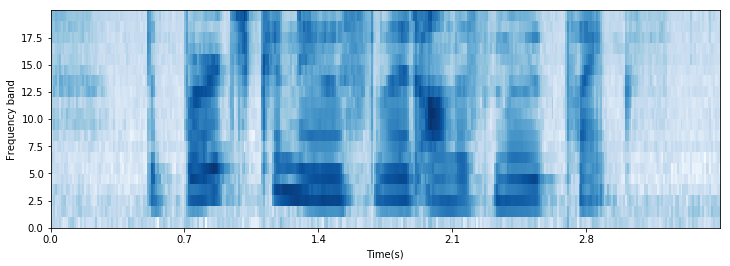

In [11]:
nfilt = 20
mel_frames = cm.mel_spec(nfilt,sample_rate, NFFT, pow_frames)
cm.show_melspec(mel_frames, sig_dur, nfilt)

Ermittlung der MFCC

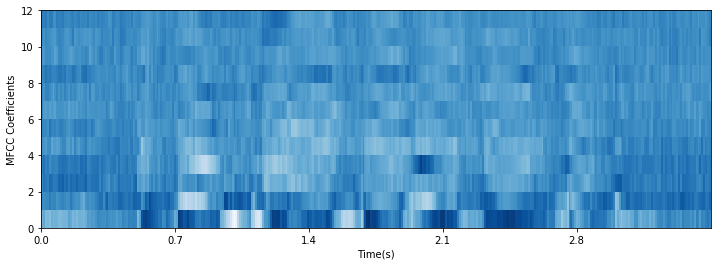

In [12]:
num_ceps = 12
mfcc = dct(mel_frames, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13
cm.show_mfcc(mfcc, sig_dur, num_ceps)

Anwendung eines Lifters

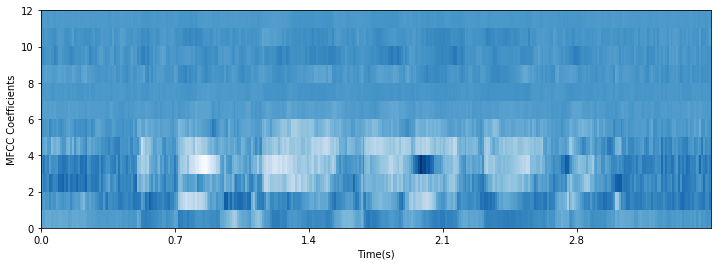

In [13]:
cep_lifter = 6
(nframes, ncoeff) = mfcc.shape
n = np.arange(ncoeff)
lift = 1 + (cep_lifter / 2) * np.sin(numpy.pi * n / cep_lifter)
mfcc *= lift  #*
cm.show_mfcc(mfcc, sig_dur, num_ceps)

Anwendung einer Mittelung auf das Melspektrum

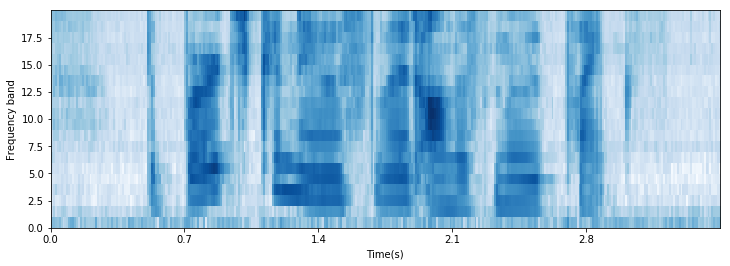

In [14]:
mel_frames -= (np.mean(mel_frames, axis=0) + 1e-8)
cm.show_melspec(mel_frames, sig_dur, nfilt)

Anwendung einer Mittelung auf die MFCC

In [ ]:
num_ceps = 12
mfcc = dct(mel_frames, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13
mfcc -= (np.mean(mfcc, axis=0) + 1e-8)
cm.show_mfcc(mfcc, sig_dur, num_ceps)